# Analyza Opavska

Abych si usetril praci, tak vyuzivam prikazy ze:
* analyzy vetru - https://github.com/martin-majlis/ms-opendata-tools/blob/master/01-Analyza-Vetru.ipynb
* simulace skoly - https://github.com/martin-majlis/ms-opendata-simulation/blob/master/Analysis.ipynb

In [1]:
# import balicku
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# nactu predpripravena data
data_raw = pd.read_csv('opavska_sensor.csv')

In [3]:
# podivam se, jake sloupce jsou dostupne
data_raw.columns

Index(['TS', 'TS_H', '0004A30B001EF8A4-Battery', '0004A30B001EF8A4-Channel',
       '0004A30B001EF8A4-LrrRSSI', '0004A30B001EF8A4-LrrSNR',
       '0004A30B001EF8A4-Packet_type', '0004A30B001EF8A4-RSSI',
       '0004A30B001EF8A4-SNR', '0004A30B001EF8A4-SpFact',
       '0004A30B001EF8A4-SubBand', '0004A30B001EF8A4-Timestamp',
       '0004A30B001EF8A4-Wind_Direction', '0004A30B001EF8A4-Wind_Speed',
       '0004A30B001EFD5D-Battery', '0004A30B001EFD5D-Channel',
       '0004A30B001EFD5D-LrrRSSI', '0004A30B001EFD5D-LrrSNR',
       '0004A30B001EFD5D-Packet_type', '0004A30B001EFD5D-RSSI',
       '0004A30B001EFD5D-SNR', '0004A30B001EFD5D-Soil_Moisture',
       '0004A30B001EFD5D-SpFact', '0004A30B001EFD5D-SubBand',
       '0004A30B001EFD5D-Timestamp', '0004A30B001F3A88-Battery',
       '0004A30B001F3A88-Channel', '0004A30B001F3A88-Events_counter',
       '0004A30B001F3A88-LrrRSSI', '0004A30B001F3A88-LrrSNR',
       '0004A30B001F3A88-Magnet_status', '0004A30B001F3A88-Packet_type',
       '0004A30

In [4]:
# Ted si vyberu sloupecky, ktere vypadaji uzitecne
COLUMNS_OPAVSKA = [
    'TS', 
    'TS_H',
    '0004A30B001EF8A4-Wind_Direction', 
    '0004A30B001EF8A4-Wind_Speed',
    '0004A30B001EFD5D-Soil_Moisture',
    '0004A30B001F3A88-Events_counter',
    '0004A30B001F3A88-Magnet_status',
    '0004A30B001F5607-Humidity',
    '0004A30B001F5607-Temperature',
    '0004A30B001F6CED-Noise'    
]
data_opavska = data_raw[COLUMNS_OPAVSKA]
data_opavska.describe()

,TS,0004A30B001EF8A4-Wind_Direction,0004A30B001EF8A4-Wind_Speed,0004A30B001EFD5D-Soil_Moisture,0004A30B001F3A88-Events_counter,0004A30B001F3A88-Magnet_status,0004A30B001F5607-Humidity,0004A30B001F5607-Temperature,0004A30B001F6CED-Noise
count,1.948000e+03,721.000000,721.000000,1247.000000,152.000000,152.000000,1827.000000,1827.000000,1687.000000
mean,1.510545e+09,221.723301,50.810014,1.760348,1.664474,0.243421,18.416777,11.899719,42.081292
std,5.172150e+05,69.873423,135.728321,1.091747,2.416675,0.430566,15.083813,9.976887,10.968802
min,1.509633e+09,0.000000,0.960000,0.000000,0.000000,0.000000,2.062000,0.767000,30.000000
25%,1.510115e+09,180.000000,0.960000,0.000000,0.000000,0.000000,3.590000,2.188000,30.000000
50%,1.510553e+09,247.500000,0.960000,2.340000,1.000000,0.000000,6.305000,2.527000,42.250000
75%,1.510991e+09,270.000000,0.960000,2.528500,2.000000,0.000000,32.350000,21.905000,51.470000
max,1.511429e+09,337.500000,648.000000,3.081000,15.000000,1.000000,48.100000,25.370000,90.620000


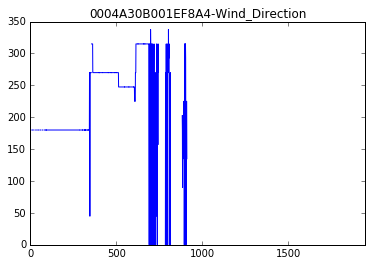

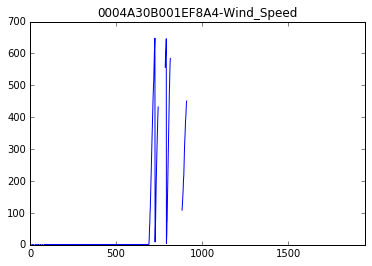

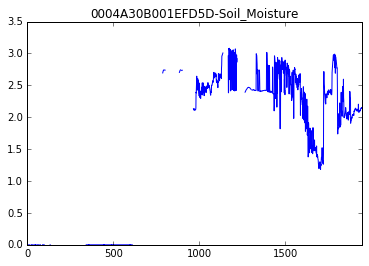

In [5]:
# Z analyzy vetru vime, ze senzor pro mereni vetru je rozbity
# Ted si vyrobime grafy pro vsechny hodnoty. 
# Protoze maji ruzne jednotky, nema smysl je davat do jednoho grafu.
# Bud bych mohl nekolikrat zkopirovat prikaz pro vygenerovani grafu:
data_opavska['0004A30B001EF8A4-Wind_Direction'].plot(title='0004A30B001EF8A4-Wind_Direction')
plt.show()
data_opavska['0004A30B001EF8A4-Wind_Speed'].plot(title='0004A30B001EF8A4-Wind_Speed')
plt.show()
data_opavska['0004A30B001EFD5D-Soil_Moisture'].plot(title='0004A30B001EFD5D-Soil_Moisture')
plt.show()


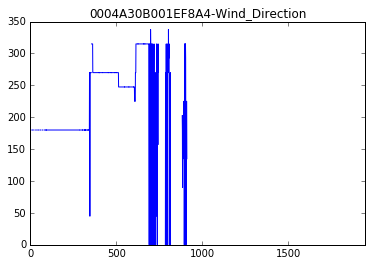

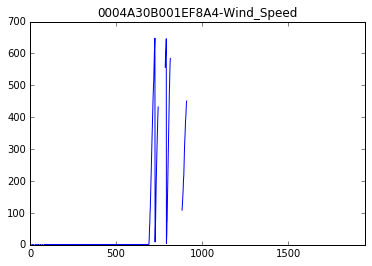

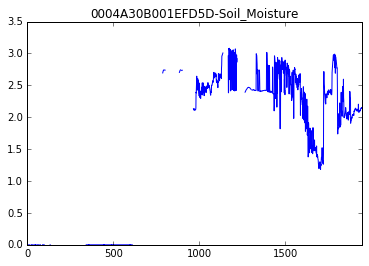

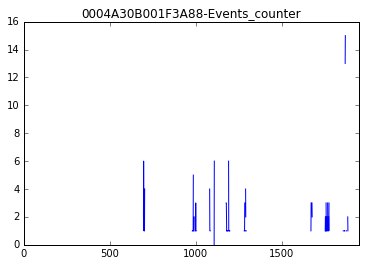

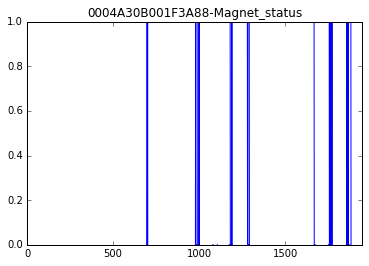

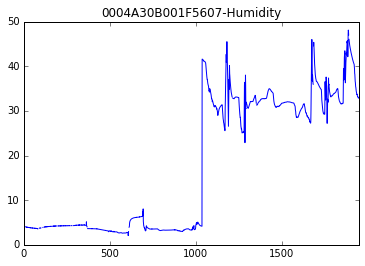

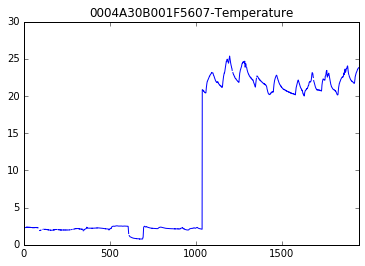

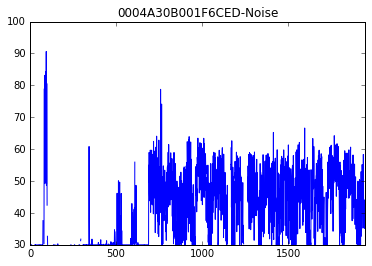

In [6]:
# Nebo muzu udelat smycku pro vsechny sloupecky
for col in COLUMNS_OPAVSKA:
    if col in ['TS', 'TS_H']:
        continue
    data_opavska[col].plot(title=col)
    plt.show()

In [7]:
data_opavska

,TS,TS_H,0004A30B001EF8A4-Wind_Direction,0004A30B001EF8A4-Wind_Speed,0004A30B001EFD5D-Soil_Moisture,0004A30B001F3A88-Events_counter,0004A30B001F3A88-Magnet_status,0004A30B001F5607-Humidity,0004A30B001F5607-Temperature,0004A30B001F6CED-Noise
0,1.509633e+09,2017-11-02 15:15:00,180.0,0.96,NaN,NaN,NaN,4.121,2.285,30.00
1,1.509633e+09,2017-11-02 15:30:00,NaN,NaN,NaN,NaN,NaN,4.114,2.289,NaN
2,1.509635e+09,2017-11-02 15:45:00,180.0,0.96,NaN,NaN,NaN,4.071,2.272,30.00
3,1.509635e+09,2017-11-02 16:00:00,180.0,0.96,0.000,NaN,NaN,4.089,2.268,30.00
4,1.509636e+09,2017-11-02 16:15:00,180.0,0.96,NaN,NaN,NaN,4.086,2.280,NaN
5,1.509637e+09,2017-11-02 16:30:00,NaN,NaN,NaN,NaN,NaN,4.075,2.290,30.00
6,1.509638e+09,2017-11-02 16:45:00,180.0,0.96,0.000,NaN,NaN,4.069,2.298,30.00
7,1.509640e+09,2017-11-02 17:15:00,NaN,NaN,0.000,NaN,NaN,4.055,2.310,30.00
8,1.509640e+09,2017-11-02 17:30:00,NaN,NaN,NaN,NaN,NaN,4.045,2.315,30.00
9,1.509641e+09,2017-11-02 17:45:00,NaN,NaN,0.000,NaN,NaN,4.027,2.326,30.00


In [8]:
# Ted opet vyradime cast dat, kdy udaje nebyly spolehlive.
# Podle grafu to vypada, ze to zacalo fungovat, kdyz teplota stoupla nad 5 stupnu
COLUMNS_TEMP = [
    'TS_H', 
    '0004A30B001EFD5D-Soil_Moisture',
    '0004A30B001F5607-Humidity',
    '0004A30B001F5607-Temperature',
    '0004A30B001F6CED-Noise'
]
data_valid_temp = data_opavska[data_opavska['0004A30B001F5607-Temperature'] > 5][COLUMNS_TEMP]

In [9]:
# Ted se opet muzeme podivat na jejich vlastnosti
data_valid_temp.describe()

,0004A30B001EFD5D-Soil_Moisture,0004A30B001F5607-Humidity,0004A30B001F5607-Temperature,0004A30B001F6CED-Noise
count,820.000000,901.000000,901.000000,861.000000
mean,2.351955,33.404606,21.972386,45.697863
std,0.426881,4.140363,1.176040,9.287142
min,1.182000,22.880000,20.000000,30.000000
25%,2.114000,31.060000,20.920000,38.070000
50%,2.419000,32.490000,21.910000,46.820000
75%,2.637750,34.830000,22.690000,53.380000
max,3.081000,48.100000,25.370000,66.630000


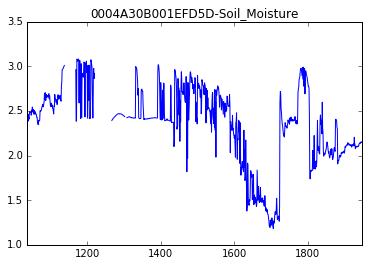

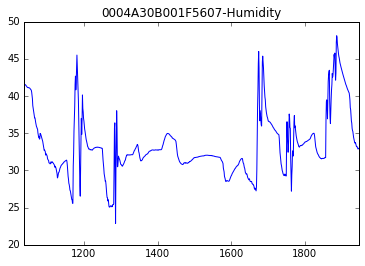

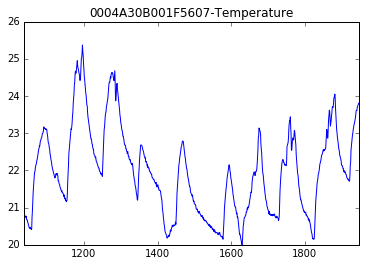

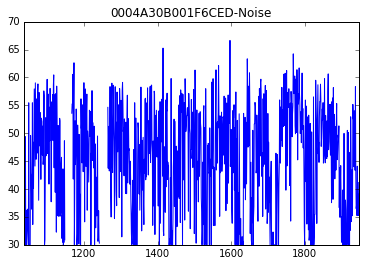

In [10]:
# Nebo muzu udelat smycku pro vsechny sloupecky
for col in COLUMNS_TEMP:
    if col in ['TS', 'TS_H']:
        continue
    data_valid_temp[col].plot(title=col)
    plt.show()

In [11]:
# A ted se muzeme podivat s cim koreluje vnitrni teplota
data_valid_temp.corr()['0004A30B001F5607-Temperature'].sort_values()

0004A30B001F5607-Humidity         0.051117
0004A30B001EFD5D-Soil_Moisture    0.169750
0004A30B001F6CED-Noise            0.246090
0004A30B001F5607-Temperature      1.000000
Name: 0004A30B001F5607-Temperature, dtype: float64

In [12]:
# Take se muzeme podivat, jaka je korelace mezi vlhosti vzduchy a ostanimi hodnotami
data_valid_temp.corr()['0004A30B001F5607-Humidity'].sort_values()

0004A30B001EFD5D-Soil_Moisture   -0.192813
0004A30B001F6CED-Noise           -0.159742
0004A30B001F5607-Temperature      0.051117
0004A30B001F5607-Humidity         1.000000
Name: 0004A30B001F5607-Humidity, dtype: float64